In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [66]:
S= "BA"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("modeldata//"+S+".csv")

In [69]:
df= pd.read_csv("modeldata//"+S+".csv",index_col="Date",parse_dates=True)
df=df[1:len(df)]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-04,55.481325,56.733619,55.306954,56.155025,5758100.0
2010-11-05,56.155010,56.789084,55.877604,56.487896,3625800.0
2010-11-08,55.528888,55.806299,55.283187,55.647778,4171600.0
2010-11-09,55.695315,55.917245,54.553989,54.886875,4587500.0
2010-11-10,53.650443,53.650443,52.937110,53.159035,10494700.0


In [70]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-11-04 to 2020-11-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2517 non-null   float64
 1   High    2517 non-null   float64
 2   Low     2517 non-null   float64
 3   Close   2517 non-null   float64
 4   Volume  2517 non-null   float64
dtypes: float64(5)
memory usage: 118.0 KB


<AxesSubplot:xlabel='Date'>

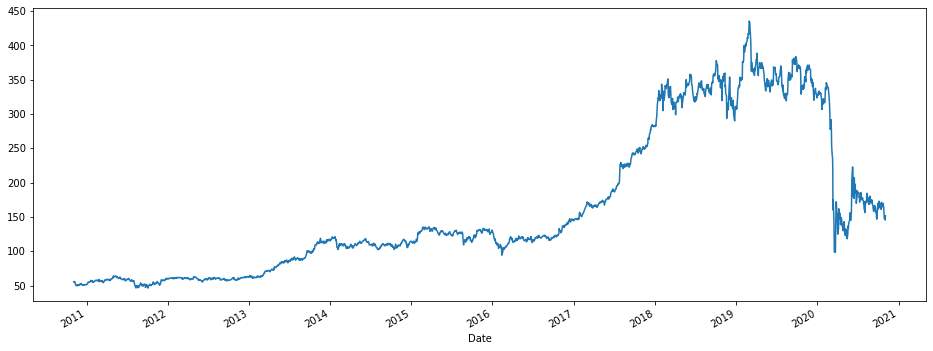

In [72]:
df['Open'].plot(figsize=(16,6))

In [73]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [74]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [75]:
X_train = []
y_train = []
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [76]:
X_train.shape

(1953, 60, 1)

In [77]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [78]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [79]:
# Initialising the RNN
regressor = Sequential()

In [80]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [81]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1953/1953 [==============================] - 7s 4ms/step - loss: 0.0079
Epoch 2/100
1953/1953 [==============================] - 7s 3ms/step - loss: 0.0024
Epoch 3/100
1953/1953 [==============================] - 7s 4ms/step - loss: 0.0019
Epoch 4/100
1953/1953 [==============================] - 7s 3ms/step - loss: 0.0019
Epoch 5/100
1953/1953 [==============================] - 7s 3ms/step - loss: 0.0020
Epoch 6/100
1953/1953 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 7/100
1953/1953 [==============================] - 7s 3ms/step - loss: 0.0018
Epoch 8/100
1953/1953 [==============================] - 7s 3ms/step - loss: 0.0015
Epoch 9/100
1953/1953 [==============================] - 7s 3ms/step - loss: 0.0014
Epoch 10/100
1953/1953 [==============================] - 7s 3ms/step - loss: 0.0016
Epoch 11/100
1953/1953 [==============================] - 7s 3ms/step - loss: 0.0015
Epoch 12/100
1953/1953 [==============================] - 7s 4ms/step - lo

# Testing

In [54]:
X_test = []
y_test = []
for i in range(60, len(testing_df)):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [57]:
X_test

array([[[0.93064914],
        [0.90961343],
        [0.91734503],
        ...,
        [0.92416217],
        [0.99547454],
        [0.99477106]],

       [[0.90961343],
        [0.91734503],
        [0.93260396],
        ...,
        [0.99547454],
        [0.99477106],
        [0.99169355]],

       [[0.91734503],
        [0.93260396],
        [0.9425103 ],
        ...,
        [0.99477106],
        [0.99169355],
        [1.00007637]],

       ...,

       [[0.3812234 ],
        [0.37730203],
        [0.37687974],
        ...,
        [0.34007933],
        [0.32149813],
        [0.30650648]],

       [[0.37730203],
        [0.37687974],
        [0.41654574],
        ...,
        [0.32149813],
        [0.30650648],
        [0.30400284]],

       [[0.37687974],
        [0.41654574],
        [0.41503752],
        ...,
        [0.30650648],
        [0.30400284],
        [0.29962903]]])

In [56]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [82]:
X_test

array([[[0.93064914],
        [0.90961343],
        [0.91734503],
        ...,
        [0.92416217],
        [0.99547454],
        [0.99477106]],

       [[0.90961343],
        [0.91734503],
        [0.93260396],
        ...,
        [0.99547454],
        [0.99477106],
        [0.99169355]],

       [[0.91734503],
        [0.93260396],
        [0.9425103 ],
        ...,
        [0.99477106],
        [0.99169355],
        [1.00007637]],

       ...,

       [[0.3812234 ],
        [0.37730203],
        [0.37687974],
        ...,
        [0.34007933],
        [0.32149813],
        [0.30650648]],

       [[0.37730203],
        [0.37687974],
        [0.41654574],
        ...,
        [0.32149813],
        [0.30650648],
        [0.30400284]],

       [[0.37687974],
        [0.41654574],
        [0.41503752],
        ...,
        [0.30650648],
        [0.30400284],
        [0.29962903]]])

In [83]:
predicted_stock_price = regressor.predict(X_test)

In [84]:
predicted_stock_price

array([[0.90805423],
       [0.9158586 ],
       [0.9238992 ],
       [0.9322263 ],
       [0.94099915],
       [0.94912195],
       [0.9551468 ],
       [0.9592259 ],
       [0.9616754 ],
       [0.96300566],
       [0.9634265 ],
       [0.96316934],
       [0.962615  ],
       [0.962005  ],
       [0.9615629 ],
       [0.96128607],
       [0.9612826 ],
       [0.96158123],
       [0.96198297],
       [0.96265936],
       [0.9638034 ],
       [0.96510696],
       [0.9660505 ],
       [0.9662682 ],
       [0.9658556 ],
       [0.96474934],
       [0.96212626],
       [0.95631886],
       [0.9480803 ],
       [0.93797386],
       [0.9269906 ],
       [0.9164381 ],
       [0.9078611 ],
       [0.90274084],
       [0.90161705],
       [0.9036366 ],
       [0.90741694],
       [0.9129125 ],
       [0.9191859 ],
       [0.92564213],
       [0.93161786],
       [0.93727577],
       [0.9425448 ],
       [0.94709885],
       [0.95037544],
       [0.95290923],
       [0.95371187],
       [0.951

In [85]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(444, 1)

In [86]:
y_test

array([[0.99169355],
       [1.00007637],
       [1.03460405],
       [1.06614225],
       [1.06165579],
       [1.03829584],
       [1.06215668],
       [1.05891638],
       [1.07517709],
       [1.06460155],
       [1.07505929],
       [1.08395538],
       [1.08878659],
       [1.10186577],
       [1.09632774],
       [1.11927531],
       [1.11488607],
       [1.11833267],
       [1.15229748],
       [1.17383116],
       [1.16561241],
       [1.12973282],
       [1.12578549],
       [1.10710916],
       [1.08769656],
       [0.95366364],
       [0.99325491],
       [0.97475549],
       [0.96462191],
       [0.9525148 ],
       [0.94992261],
       [0.9532808 ],
       [0.96376779],
       [0.96182352],
       [0.94635823],
       [0.93519356],
       [0.9663599 ],
       [0.9554901 ],
       [0.96936474],
       [0.96912903],
       [0.99646583],
       [1.00441935],
       [1.00789538],
       [0.99702558],
       [1.03261042],
       [0.96818648],
       [0.95077686],
       [0.945

In [87]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [88]:
predicted_stock_price

array([[347.45392 ],
       [350.04123 ],
       [352.70682 ],
       [355.4674  ],
       [358.37576 ],
       [361.0686  ],
       [363.06595 ],
       [364.41824 ],
       [365.23032 ],
       [365.6713  ],
       [365.81082 ],
       [365.72556 ],
       [365.5418  ],
       [365.33957 ],
       [365.193   ],
       [365.10123 ],
       [365.1001  ],
       [365.1991  ],
       [365.33228 ],
       [365.5565  ],
       [365.9358  ],
       [366.36792 ],
       [366.68073 ],
       [366.7529  ],
       [366.61612 ],
       [366.24936 ],
       [365.37976 ],
       [363.4545  ],
       [360.7233  ],
       [357.3728  ],
       [353.7317  ],
       [350.23334 ],
       [347.3899  ],
       [345.69244 ],
       [345.3199  ],
       [345.98938 ],
       [347.24265 ],
       [349.0645  ],
       [351.14426 ],
       [353.28464 ],
       [355.2657  ],
       [357.1414  ],
       [358.88818 ],
       [360.39792 ],
       [361.48416 ],
       [362.32416 ],
       [362.59024 ],
       [362.0

In [89]:
actual_stock_price.shape

(444, 1)

In [90]:
predicted_stock_price.shape

(444, 1)

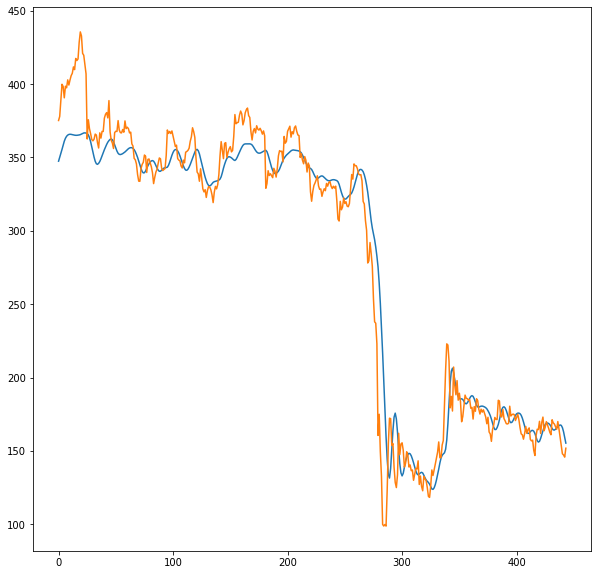

In [91]:
plt.figure(figsize=(10,10))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [92]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

In [93]:
predicted_stock_price= predicted_stock_price[-433:]
df=df[-433:]
df['Open2']= predicted_stock_price


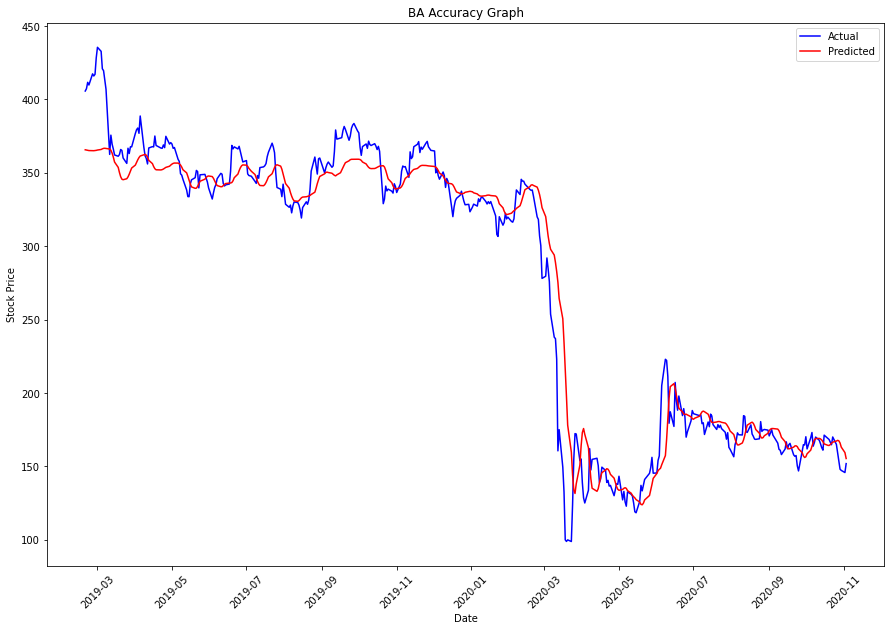

In [94]:
plt.figure(figsize=(15,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock Price',fontsize=20)
plt.xticks(rotation=45)
plt.legend(['Actual','Predicted'],fontsize=20)
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=14)
plt.savefig("modeldata//"+S+'accuracy_graph.png')

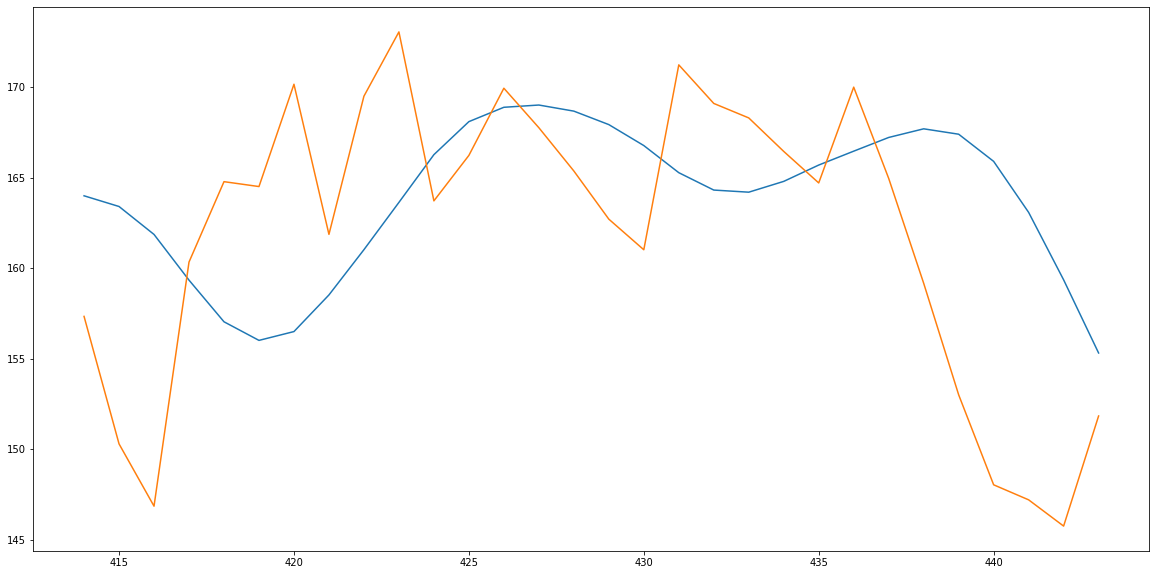

In [96]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [97]:
import pickle
Pkl_Filename = "modeldata//"+S+".pkl"  
sc_file= "modeldata//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)